**Objective**: Find the Optimal Value for the Standard Deviation of the Reservoir Weight Distribution

Under which value of the standard deviation is the exploration the best?

In [3]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from config import Params
from simulation import Simulation
from tqdm import tqdm
from agent import ReservoirAgent

folder = 'trash'
params = Params.from_json('parameters.json')

if params.agent != ReservoirAgent:
    raise ValueError("This script is designed for reservoir agents only.")

std_range = list(np.arange(0.01, 0.06, 0.005))
fitness_reservoir_1000 = []
fitness_reservoir_100 = []
fitness_reservoir_10 = []

for std in tqdm(std_range, position=0):
    params.standard_deviation = std
    sim = Simulation(params, params.agent)
    fitness_reservoir_1000.append(np.mean(sim.run(folder)))

# import multiprocessing as mp

# def run_simulation(std, params, folder):
#     params.standard_deviation = std
#     sim = Simulation(params, params.agent)
#     return np.mean(sim.run(folder))

# std_range = list(np.arange(0.01, 0.05, 0.001))

# # Prepare arguments as a list of tuples for starmap
# args = [(std, params, folder) for std in std_range]

# with mp.Pool(processes=2) as pool:
#     fitness_values = pool.starmap(run_simulation, args)

100%|██████████| 10/10 [02:45<00:00, 16.58s/it]


In [ ]:
# BROWNIAN
from agent import BrownianAgent
params.type = 'brownian'
params.agent = BrownianAgent
sim = Simulation(params, params.agent)
fitnesses = sim.run(folder)
fitness_brownian = np.mean(fitnesses)

# LÉVY
from agent import LévyAgent
params.type = 'levy'
params.agent = LévyAgent
sim = Simulation(params, params.agent)
fitnesses = sim.run(folder)
fitness_levy = np.mean(fitnesses)

# BALLISTIC
from agent import BallisticAgent
params.type = 'ballistic'
params.agent = BallisticAgent
sim = Simulation(params, params.agent)
fitnesses = sim.run(folder)
fitness_ballistic = np.mean(fitnesses)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:11<00:00,  2.32s/it]


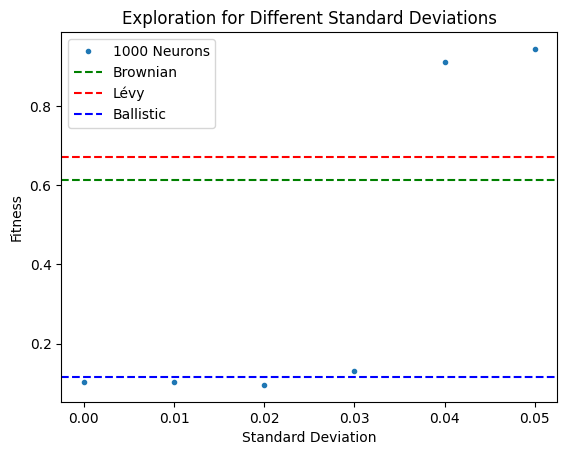

In [ ]:
import matplotlib.pyplot as plt

plt.plot(std_range, fitness_reservoir_1000, '.', label='1000 Neurons')
plt.axhline(y=fitness_brownian, color='g', linestyle='--', label='Brownian')
plt.axhline(y=fitness_levy, color='r', linestyle='--', label='Lévy')
plt.axhline(y=fitness_ballistic, color='b', linestyle='--', label='Ballistic')
plt.legend()
plt.xlabel('Standard Deviation')
plt.ylabel('Fitness')
plt.title('Exploration for Different Standard Deviations')
plt.show()